In [1]:
import numpy as np
import torch
# At the start of your notebook
from IPython.display import clear_output
import gc

# After heavy computations
clear_output(wait=True)
gc.collect()

0

In [2]:
from steps import setup_and_train_models, analyze_seizure_propagation
import torch
from datasetConstruct import construct_channel_recognition_dataset
from models import Wavenet, train_using_optimizer
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
RESULT_FOLDER = "result"
MODEL_FOLDER = "model"
model_names = ['Wavenet']  # 'CNN1D', 'Wavenet', 'LSTM'

In [4]:
# Do batch analysis to find the best hyperparameters
seizures = [1, 2, 3, 5, 7]
thresholds = [0.8]
smooth_windows = [80]

In [5]:
results, models = setup_and_train_models(
    data_folder="data",
    model_folder="checkpoints",
    model_names=model_names,  # Only use CNN1D and Wavenet
    train=False,
    params={'epochs': 60, 'batch_size': 4096}
)

Removed 0 zero-padded samples out of 143136 total samples
Using 143136 samples from each class for balanced dataset
Final dataset shapes - Training: (229017, 1, 128), Validation: (57255, 1, 128)
Removed 0 zero-padded samples out of 21056 total samples
Using 21056 samples from each class for balanced dataset
Final dataset shapes - Training: (33689, 1, 128), Validation: (8423, 1, 128)
Removed 29570 zero-padded samples out of 225000 total samples
Using 98000 samples from each class for balanced dataset
Final dataset shapes - Training: (156800, 1, 128), Validation: (39200, 1, 128)


In [6]:
results_propagation_total = []
model_name = 'Wavenet'
model = models[model_name]
threshold = 0.8
smooth_window = 80
LOAD=True
filename = f'{RESULT_FOLDER}/results_propagation_{model_name}_{threshold}_{smooth_window}.pkl'

# if file exists
if os.path.exists(filename) and LOAD:
    with open(filename, 'rb') as f:
        results_propagation_total = pickle.load(f)
        
if len(results_propagation_total) == 0:
    for PAT_NO in [65, 66]:
        for seizure_no in seizures:
            if PAT_NO == 66 and seizure_no > 3:
                continue
            params = {
                'threshold': threshold,
                'smooth_window': smooth_window,
                'n_seconds': 60,
                'seizure_start': 10,
            }
            results_propagation = analyze_seizure_propagation(
                patient_no=PAT_NO,
                seizure_no=seizure_no,
                model=model,
                data_folder='data',
                params=params,
                save_results_ind=False
            )
            results_propagation_total.append(results_propagation)
            
    with open(filename, 'wb') as f:
        pickle.dump(results_propagation_total, f)

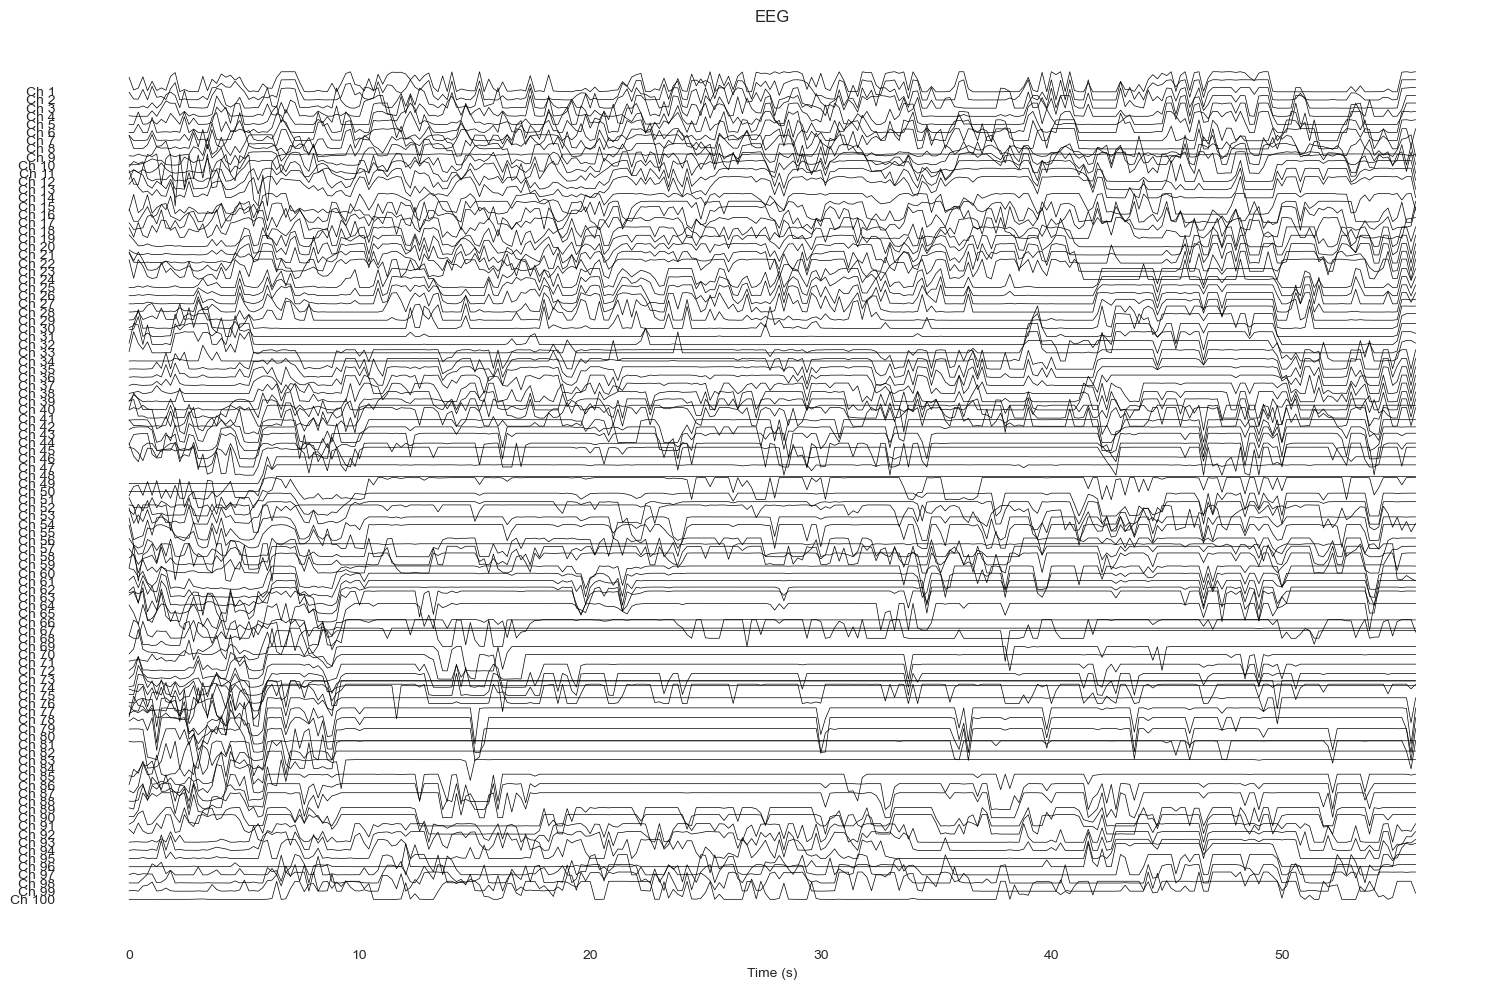

In [61]:
# Examine the result:
from plotFun import plot_eeg_style
# 1. Plot the smoothed result:
sample_result = results_propagation_total[5]['smoothed_probabilities'][20:350]
sample_result2 = results_propagation_total[5]['probabilities'][20:300]
fig = plot_eeg_style(sample_result2.T, sampling_rate=5)
plt.show()

In [8]:
# # Load and test the augmented data
# augdata = pd.read_csv('data/clips.tar.gz', compression='gzip', header=0, sep=' ;', encoding='ISO-8859-2', quotechar='"', engine='python')


In [42]:
seizure_channels_dataset_train, seizure_channels_dataset_val, seizure_onset_dataset_train, seizure_onset_dataset_val = construct_channel_recognition_dataset(results_propagation_total, 50, batch_size=128, data_aug=False)

In [43]:
# Define the model
model_seizure_channel = Wavenet(input_dim=1, output_dim=2, lr=0.001)

# Train the model
train_loss, val_loss, val_accuracy = train_using_optimizer(model_seizure_channel, seizure_channels_dataset_train, seizure_channels_dataset_val, epochs=200, checkpoint_freq=20)

Epoch 20/200: 100%|██████████| 23/23 [00:00<00:00, 155.30it/s, loss=0.7125, avg_loss=0.6915]


Epoch [20/200]
Training Loss: 0.6915
Validation Loss: 0.6916
Validation Accuracy: 0.5069


Epoch 40/200: 100%|██████████| 23/23 [00:00<00:00, 142.34it/s, loss=0.6794, avg_loss=0.6838]


Epoch [40/200]
Training Loss: 0.6838
Validation Loss: 0.6850
Validation Accuracy: 0.5482


Epoch 60/200: 100%|██████████| 23/23 [00:00<00:00, 149.34it/s, loss=0.6700, avg_loss=0.6826]


Epoch [60/200]
Training Loss: 0.6826
Validation Loss: 0.6834
Validation Accuracy: 0.5496


Epoch 80/200: 100%|██████████| 23/23 [00:00<00:00, 146.61it/s, loss=0.6629, avg_loss=0.6772]


Epoch [80/200]
Training Loss: 0.6772
Validation Loss: 0.6791
Validation Accuracy: 0.5482


Epoch 100/200: 100%|██████████| 23/23 [00:00<00:00, 141.54it/s, loss=0.6625, avg_loss=0.6729]


Epoch [100/200]
Training Loss: 0.6729
Validation Loss: 0.6720
Validation Accuracy: 0.5854


Epoch 120/200: 100%|██████████| 23/23 [00:00<00:00, 147.81it/s, loss=0.6439, avg_loss=0.6689]


Epoch [120/200]
Training Loss: 0.6689
Validation Loss: 0.6647
Validation Accuracy: 0.6198


Epoch 140/200: 100%|██████████| 23/23 [00:00<00:00, 140.59it/s, loss=0.6777, avg_loss=0.6655]


Epoch [140/200]
Training Loss: 0.6655
Validation Loss: 0.6623
Validation Accuracy: 0.6157


Epoch 160/200: 100%|██████████| 23/23 [00:00<00:00, 145.57it/s, loss=0.6458, avg_loss=0.6630]


Epoch [160/200]
Training Loss: 0.6630
Validation Loss: 0.6625
Validation Accuracy: 0.6061


Epoch 180/200: 100%|██████████| 23/23 [00:00<00:00, 142.41it/s, loss=0.6517, avg_loss=0.6643]


Epoch [180/200]
Training Loss: 0.6643
Validation Loss: 0.6631
Validation Accuracy: 0.6129


Epoch 200/200: 100%|██████████| 23/23 [00:00<00:00, 143.24it/s, loss=0.6541, avg_loss=0.6595]


Epoch [200/200]
Training Loss: 0.6595
Validation Loss: 0.6628
Validation Accuracy: 0.5895


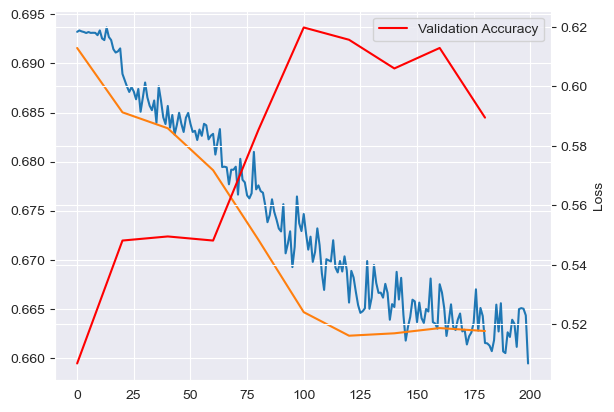

In [44]:
# Plot the training and validation loss

x_ticks = range(0, 200, 20)

plt.plot(train_loss, label='Train')
plt.plot(x_ticks, val_loss, label='Validation')
# Twin the y-axis for accuracy of validation
plt.twinx()
plt.plot(x_ticks, val_accuracy, label='Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('result/loss_seizure_channels.png')

plt.show()

In [78]:
predicted_labels_total = []

time_lengths = [10, 20, 30, 40, 50, 60]

for i in range(len(results_propagation_total)):

    sample_seizure = results_propagation_total[i]['smoothed_probabilities'][50:300, :]
    
    # Feed the data to the model and get predictions
    sample_seizure = sample_seizure.T
    sample_seizure = np.expand_dims(sample_seizure, axis=1)
    
    # Convert to tensor
    sample_seizure = torch.tensor(sample_seizure, dtype=torch.float32)
    
    # Get the predictions
    predictions = model_seizure_channel(sample_seizure)
    
    # Get the predicted labels, where predicted_labels = 1 when chance is more than 80%
    predicted_labels = predictions.detach().to('cpu').numpy()
    
    predicted_labels = predicted_labels[:, 1] > 0.5
    
    predicted_labels_total.append(predicted_labels)

In [79]:
# Convert the channel from results_propagation to the y_true as 1s and 0s
gound_truth_total = []
for i in range(len(results_propagation_total)):
    y_true = np.zeros(results_propagation_total[i]['smoothed_probabilities'].shape[1])
    y_true[results_propagation_total[i]['true_seizure_channels']] = 1
    gound_truth_total.append(y_true)
    
# Convert the gound_truth_total to a single array
gound_truth_total = np.concatenate(gound_truth_total)

# Convert the predicted_labels_total to a single array
predicted_labels_total = np.concatenate(predicted_labels_total)

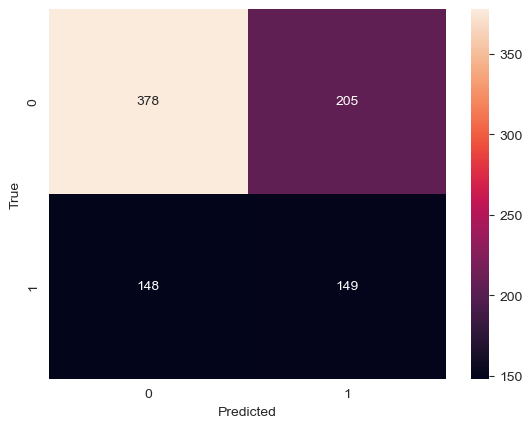

In [80]:
# Plot the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(gound_truth_total.flatten(), predicted_labels_total.flatten())
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('result/confusion_matrix_seizure_channels.png')

plt.show()


In [65]:
# Calculate the accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(gound_truth_total.flatten(), predicted_labels_total.flatten())
precision = precision_score(gound_truth_total.flatten(), predicted_labels_total.flatten())
recall = recall_score(gound_truth_total.flatten(), predicted_labels_total.flatten())
f1 = f1_score(gound_truth_total.flatten(), predicted_labels_total.flatten())

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1: {f1}')

Accuracy: 0.3465909090909091
Precision: 0.33608490566037735
Recall: 0.9595959595959596
F1: 0.4978165938864629
